# Model Comparison

In [29]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tabulate import tabulate
from matplotlib.ticker import ScalarFormatter
from PIL import Image
from Model_comparison_functions import *

Set path:


In [30]:
desktop_path = os.path.expanduser("~/Desktop")
#os.chdir(desktop_path+'\DTU MSc\MSc thesis\git\lightenup')
os.chdir(desktop_path+'\Thesis')
Add_on_path = "\\Results\\Base_case - GA\\Acceptance\\"
Add_on_path = "\\Results\\"
current_directory = os.getcwd()  # Jupyter file take the current directory as where the jupyter file is located. Different than a .py file...

In [31]:
df_Exp_Profit = json_to_df(current_directory + Add_on_path +  'Exp_profit.json')
df_RT_Profit = json_to_df(current_directory + Add_on_path + 'RT_profit.json')

In [32]:
print(df_RT_Profit)

         f1_d5_upd24_t25  f1_d5_upd84_t85  f1_d5_upd33_t34  f1_d5_upd74_t75   
sto          3583.217875      2521.112883      1892.062021      3011.998209  \
det          4185.966364      3243.907822      3298.052672      4007.582188   
oracle       5419.626411      4985.660185      3808.381413      4628.392218   
feature      3777.297261      2840.460488      1905.280104      2987.808461   
rule         2578.426084      2065.328428      1521.156963      1897.251768   

         f1_d5_upd16_t17  f1_d5_upd76_t77  f1_d5_upd0_t1  f1_d5_upd49_t50   
sto          2745.980753      3021.099016     621.509722      2412.246940  \
det          4051.536736      3756.396685     631.678489      2411.227830   
oracle       8989.238031      4469.735546    9112.375125      3269.841606   
feature      3040.693229      2997.714406    2795.063051      2554.200565   
rule         2441.533637      2007.245705    5038.621781      1350.832935   

         f1_d5_upd86_t87  f1_d5_upd73_t74  ...  f1_d5_upd46_t4

In [33]:
Array = Create_Array_from_Profit(df_Exp_Profit,df_RT_Profit,NumForecasts=1, SampleSizes=[5])

In [34]:
print(np.shape(Array))

(1, 1, 88, 5, 2, 1)


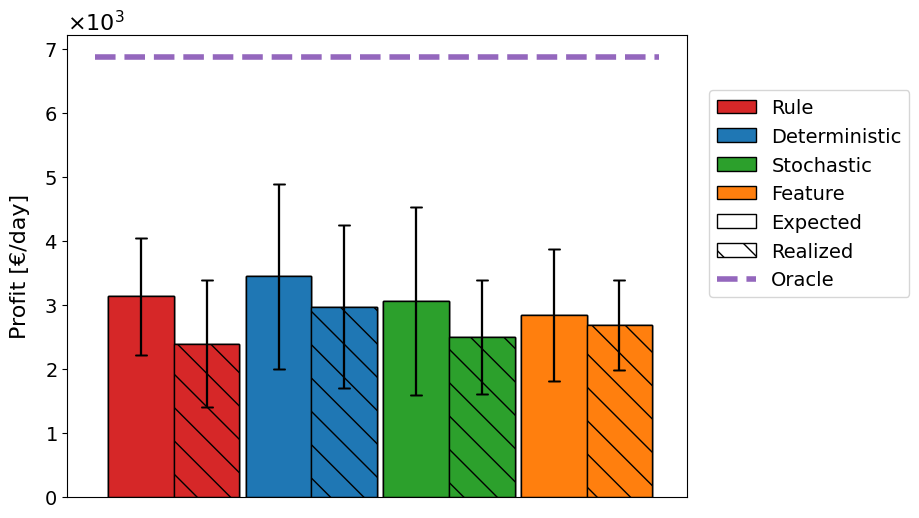

In [35]:
plot_profit_Test(Array,PlotCase = "", x_axis_label = "", Selected_Profit = ["Expected",'Realized'], barwidth = 0.1, ShowEachTestDay = False,save = False)

In [36]:
fixd5 = [f'f{1}_d{5}_upd{d}_t{d+1}' for d in range(0,88)]
print(fixd5)

x_axis = [upd for upd in range(0,88)]
data_RT = df_RT_Profit[fixd5].T
data_Exp = df_Exp_Profit[fixd5].T
print(df_RT_Profit[fixd5].mean(axis=1))
print(df_Exp_Profit[fixd5].mean(axis=1))

['f1_d5_upd0_t1', 'f1_d5_upd1_t2', 'f1_d5_upd2_t3', 'f1_d5_upd3_t4', 'f1_d5_upd4_t5', 'f1_d5_upd5_t6', 'f1_d5_upd6_t7', 'f1_d5_upd7_t8', 'f1_d5_upd8_t9', 'f1_d5_upd9_t10', 'f1_d5_upd10_t11', 'f1_d5_upd11_t12', 'f1_d5_upd12_t13', 'f1_d5_upd13_t14', 'f1_d5_upd14_t15', 'f1_d5_upd15_t16', 'f1_d5_upd16_t17', 'f1_d5_upd17_t18', 'f1_d5_upd18_t19', 'f1_d5_upd19_t20', 'f1_d5_upd20_t21', 'f1_d5_upd21_t22', 'f1_d5_upd22_t23', 'f1_d5_upd23_t24', 'f1_d5_upd24_t25', 'f1_d5_upd25_t26', 'f1_d5_upd26_t27', 'f1_d5_upd27_t28', 'f1_d5_upd28_t29', 'f1_d5_upd29_t30', 'f1_d5_upd30_t31', 'f1_d5_upd31_t32', 'f1_d5_upd32_t33', 'f1_d5_upd33_t34', 'f1_d5_upd34_t35', 'f1_d5_upd35_t36', 'f1_d5_upd36_t37', 'f1_d5_upd37_t38', 'f1_d5_upd38_t39', 'f1_d5_upd39_t40', 'f1_d5_upd40_t41', 'f1_d5_upd41_t42', 'f1_d5_upd42_t43', 'f1_d5_upd43_t44', 'f1_d5_upd44_t45', 'f1_d5_upd45_t46', 'f1_d5_upd46_t47', 'f1_d5_upd47_t48', 'f1_d5_upd48_t49', 'f1_d5_upd49_t50', 'f1_d5_upd50_t51', 'f1_d5_upd51_t52', 'f1_d5_upd52_t53', 'f1_d5_upd5

c:\Users\Daniel  BV\Desktop\Thesis\lightenup\Model and Result Examination\Model_comparison_functions.py:137: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(x_axis,data[model], 'o-',color=color_models[m],drawstyle=drawstyle,markersize=10, linewidth=1,linestyle='--', marker='o')
c:\Users\Daniel  BV\Desktop\Thesis\lightenup\Model and Result Examination\Model_comparison_functions.py:137: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o-" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x_axis,data[model], 'o-',color=color_models[m],drawstyle=drawstyle,markersize=10, linewidth=1,linestyle='--', marker='o')


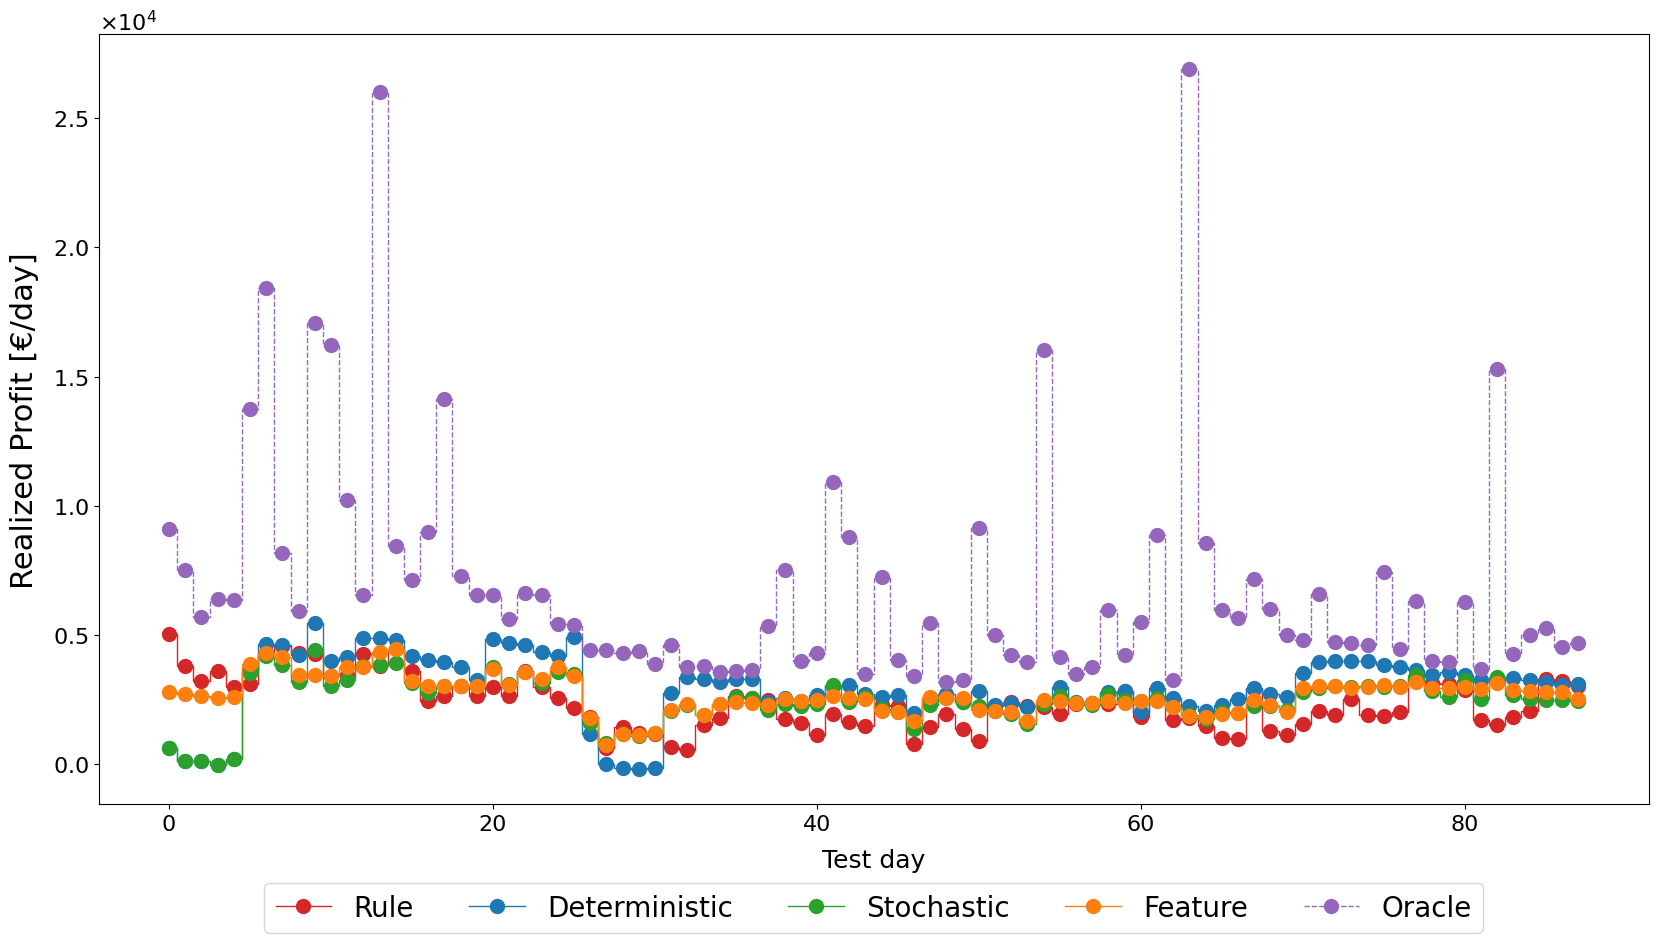

In [37]:
plot_each_test_day_Profit(data_RT,['rule','det','sto','feature','oracle'],x_axis,'steps-mid',save=True)

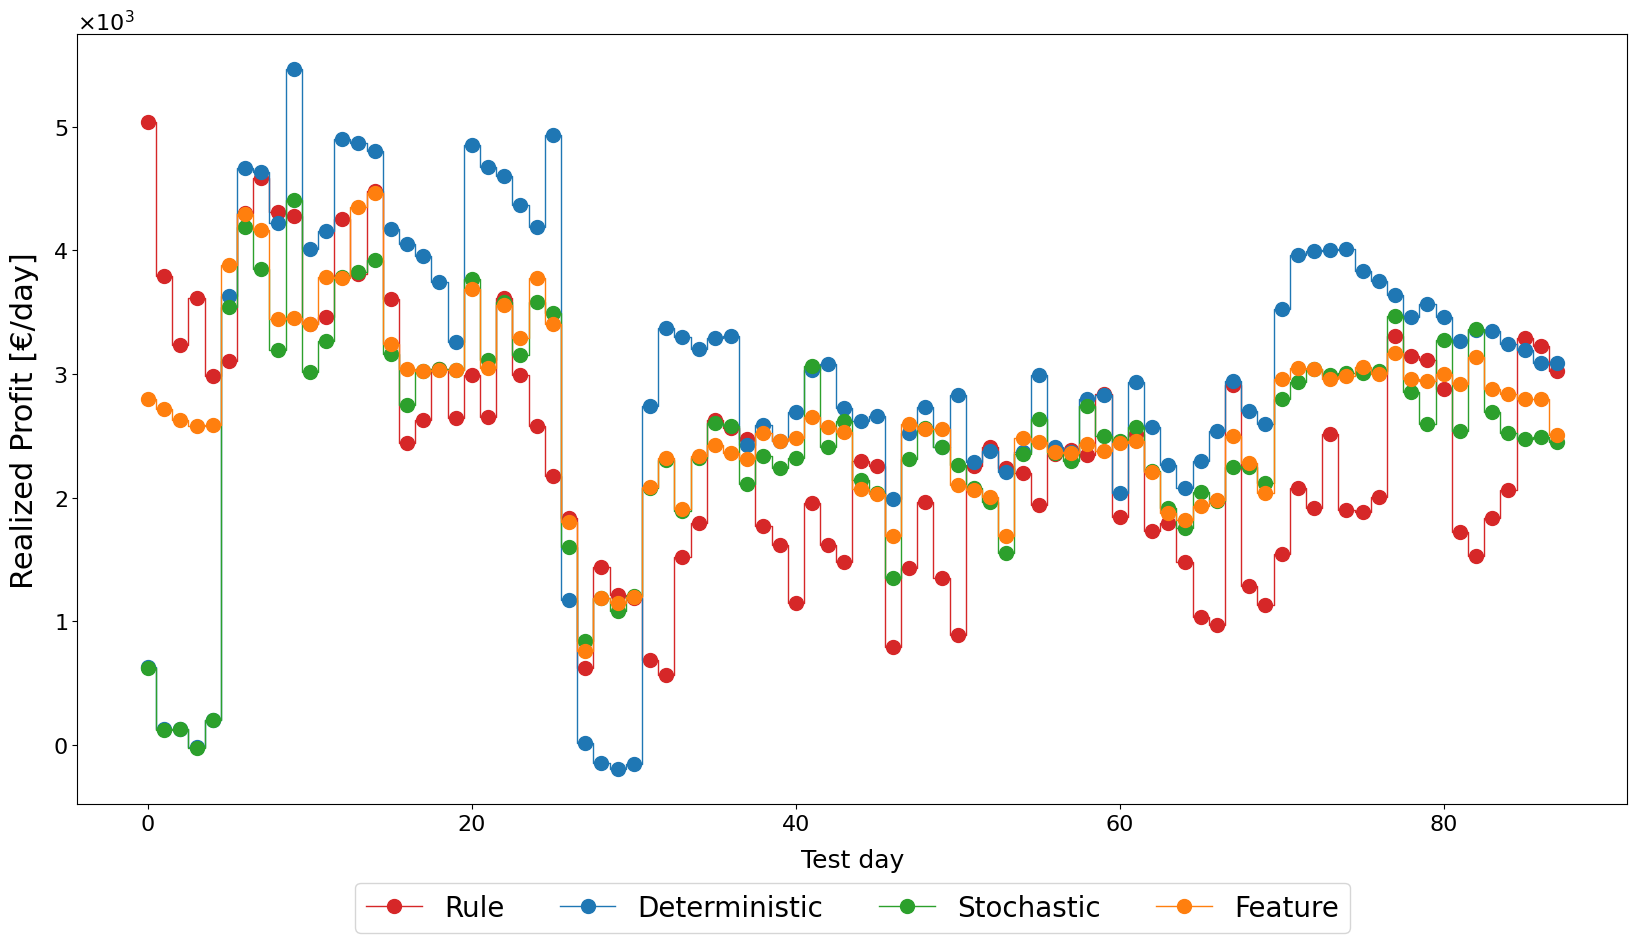

In [38]:
plot_each_test_day_Profit(data_RT,['rule','det','sto','feature'],x_axis,'steps-mid')

## Pick specific ones:

Interesting cases:
day 6 - Feature is best?

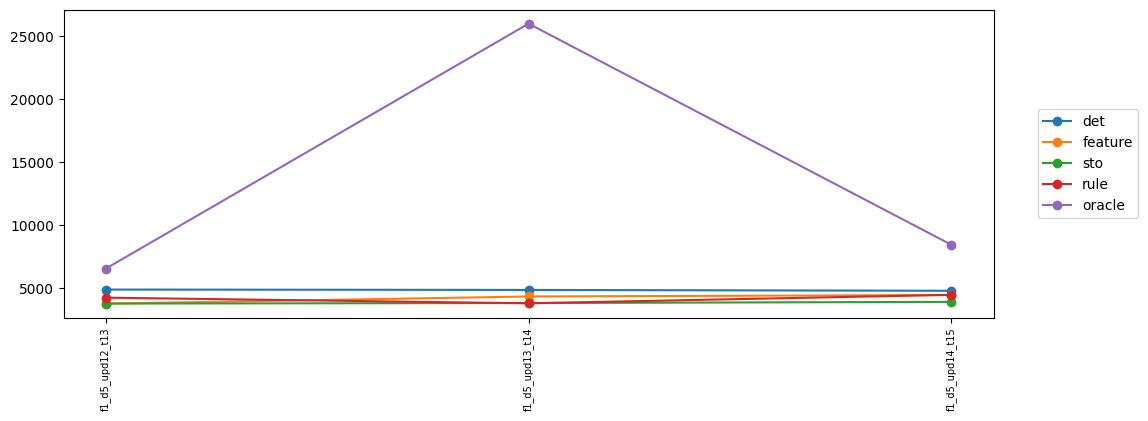

In [39]:
f = 1
d = 5

fixd5 = [f'f{f}_d{d}_upd{upd}_t{upd+1}' for upd in range(12,15)]
data = df_RT_Profit[fixd5].T
models = ['det','feature','sto','rule','oracle']
plot = data[models]
plt.figure(figsize=(12,4))
plt.plot(plot, 'o-')
plt.xticks(rotation = 90, fontsize=7)
plt.legend(models, bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.show()

['f1_d5_upd27_t28', 'f1_d5_upd28_t29']


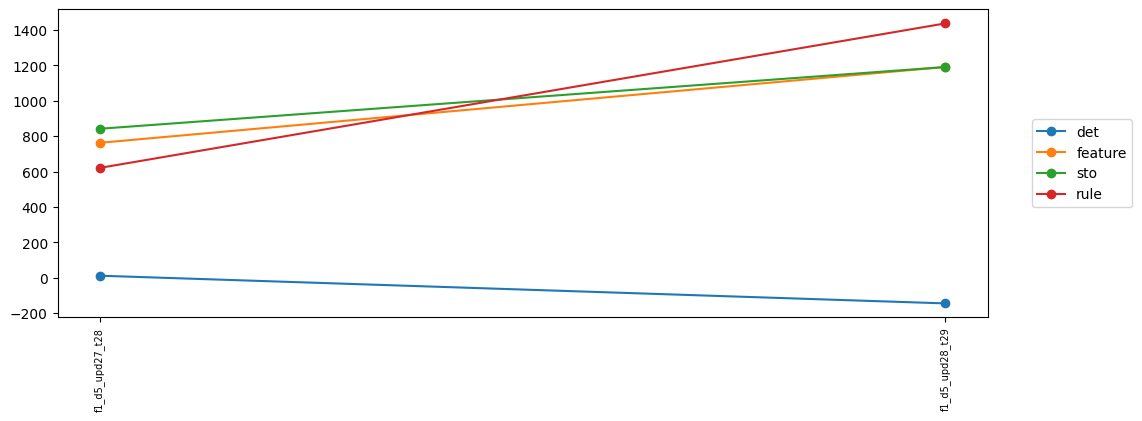

In [40]:
f = 1
d = 5

fixd5 = [f'f{f}_d{d}_upd{upd}_t{upd+1}' for upd in range(27,29)]
print(fixd5)

data = df_RT_Profit[fixd5].T
models = ['det','feature','sto','rule']
plot = data[models]
plt.figure(figsize=(12,4))
plt.plot(plot, 'o-')
plt.xticks(rotation = 90, fontsize=7)
plt.legend(models, bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.show()

['f1_d5_upd29_t30', 'f1_d5_upd30_t31', 'f1_d5_upd31_t32']


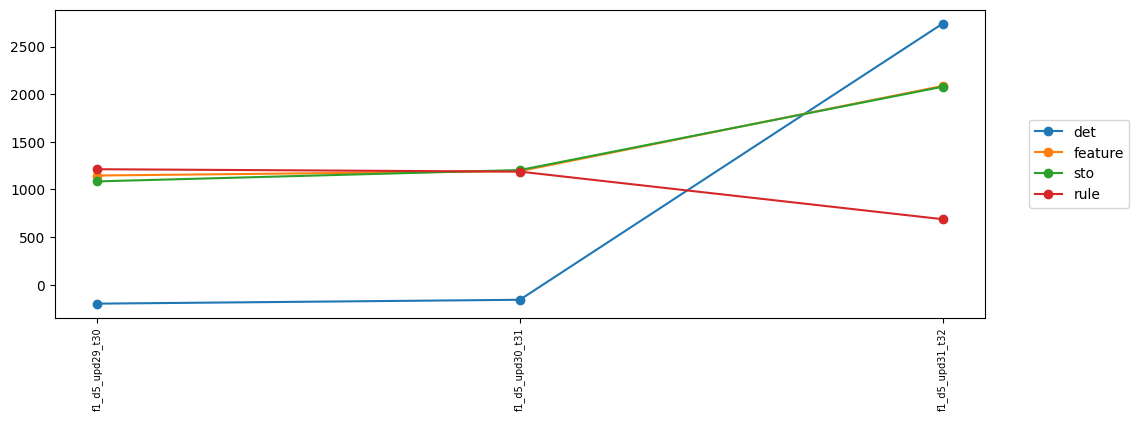

In [41]:
f = 1
d = 5

fixd5 = [f'f{f}_d{d}_upd{upd}_t{upd+1}' for upd in range(29,32)]
print(fixd5)

data = df_RT_Profit[fixd5].T
models = ['det','feature','sto','rule']
plot = data[models]
plt.figure(figsize=(12,4))
plt.plot(plot, 'o-')
plt.xticks(rotation = 90, fontsize=7)
plt.legend(models, bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.show()

## Look at bid quantity behavior over whole test span

In [42]:
Array_Acceptance,Array_Bid = Collect_bid_results(current_directory,Add_on_path,1,5,["1.0"])


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Daniel  BV\\Desktop\\Thesis\\Results\\/oracle_f1_d5_upd0_t1.json'

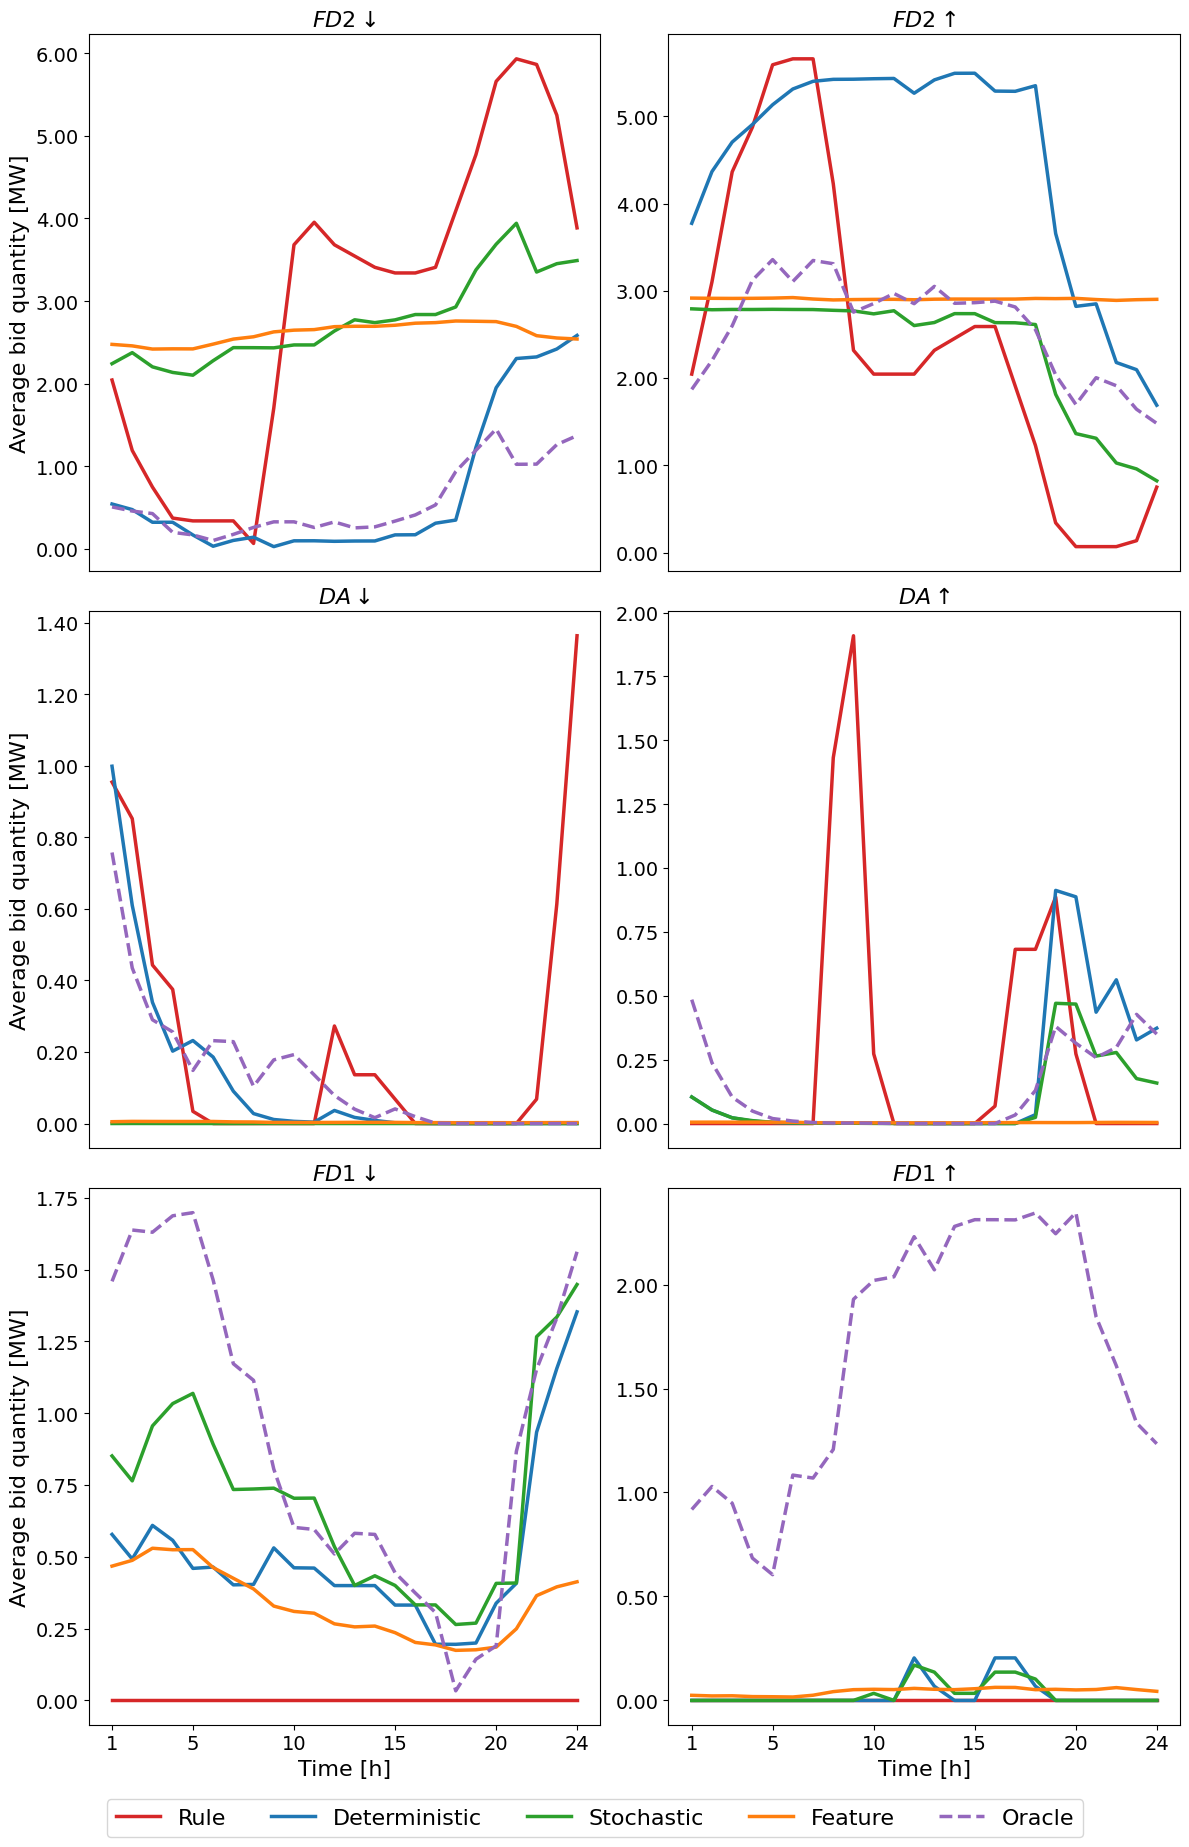

In [ ]:
Plot_average_bid_quantities(Array_Acceptance,Array_Bid)

### Interesting model behavior cases:

- 0 - 4 (rule is the best)
- 63-65 (det is the best)
- 41,80 (sto is the best)
- 7,14,1581 (fea is best?)



In [ ]:
CountArray, model_order,profit_type_order = Count_performance_for_each_model(Array)
print(model_order,profit_type_order)
print(np.shape(CountArray))
print(np.shape(np.sum(CountArray, axis=2)))

['rule', 'det', 'sto', 'feature', 'oracle'] ['Expected', 'RT']
(1, 1, 88, 4, 2)
(1, 1, 4, 2)


In [ ]:
CountArray_new  = np.sum(CountArray, axis=2)

In [ ]:
print(df_RT_Profit[fixd5].mean(axis=1))
print(df_Exp_Profit[fixd5].mean(axis=1))

sto        1455.483222
det         794.856161
oracle     4290.848011
feature    1476.562544
rule       -209.504885
dtype: float64
sto        2756.176411
det        3556.579807
oracle     4290.848011
feature    2760.183623
rule       2944.494660
dtype: float64


In [ ]:
meanRT = df_RT_Profit[fixd5].mean(axis=1)
meanExp = df_Exp_Profit[fixd5].mean(axis=1)

In [ ]:
result_summary = [["Expected profit average [\euro/day]", int(meanExp['rule']),int(meanExp['det']),int(meanExp['sto']),int(meanExp['feature']) ],
                    ["Realized profit average [\euro/day]", int(meanRT['rule']),int(meanRT['det']),int(meanRT['sto']),int(meanRT['feature'] )],
                    ["Highest expected profit [count]", CountArray_new[0,0,0,0],CountArray_new[0,0,1,0],CountArray_new[0,0,2,0],CountArray_new[0,0,3,0] ],
                    ["Highest realized profit [count]", CountArray_new[0,0,0,1],CountArray_new[0,0,1,1],CountArray_new[0,0,2,1],CountArray_new[0,0,3,1]  ]
                    ]
headers = ["Rule", "Deterministic", "Stochastic", "Feature"]
table = tabulate(result_summary, headers, tablefmt="grid")
print(table)

+-------------------------------------+--------+-----------------+--------------+-----------+
|                                     |   Rule |   Deterministic |   Stochastic |   Feature |
+=====================================+========+=================+==============+===========+
| Expected profit average [\euro/day] |   2944 |            3556 |         2756 |      2760 |
+-------------------------------------+--------+-----------------+--------------+-----------+
| Realized profit average [\euro/day] |   -209 |             794 |         1455 |      1476 |
+-------------------------------------+--------+-----------------+--------------+-----------+
| Highest expected profit [count]     |     59 |              29 |            0 |         0 |
+-------------------------------------+--------+-----------------+--------------+-----------+
| Highest realized profit [count]     |      5 |              69 |            4 |        10 |
+-------------------------------------+--------+------------

In [ ]:
headers = ["Rule", "Deterministic", "Stochastic", "Feature"]

# Generate LaTeX table code
table_code = "\\begin{table}[H]\n"
table_code += "\\centering\n"
table_code += "\\caption{Summary of Base case Results}\n"
table_code += "\\label{tab:base_case_results}\n"
table_code += "\\begin{tabular}{|" + "|".join(["l"] + ["c"] * (len(headers))) + "|}\n"
table_code += "\\hline\n"
table_code += " & " + " & ".join(headers) + " \\\\\n"
table_code += "\\hline\n"

for row in result_summary:
    table_code += " & ".join(str(item) for item in row) + " \\\\\n"

table_code += "\\hline\n"
table_code += "\\end{tabular}\n"
table_code += "\\end{table}"

print(table_code)


\begin{table}[H]
\centering
\caption{Summary of Base case Results}
\label{tab:base_case_results}
\begin{tabular}{|l|c|c|c|c|}
\hline
 & Rule & Deterministic & Stochastic & Feature \\
\hline
Expected profit average [\euro/day] & 2944 & 3556 & 2756 & 2760 \\
Realized profit average [\euro/day] & -209 & 794 & 1455 & 1476 \\
Highest expected profit [count] & 59 & 29 & 0 & 0 \\
Highest realized profit [count] & 5 & 69 & 4 & 10 \\
\hline
\end{tabular}
\end{table}


# EXAMINE EXPECTED RESULTS
#### WHY IS RULE BETTER SOMETIMES AND STO AND FEATURE IS NEVER IN EXPECTED??

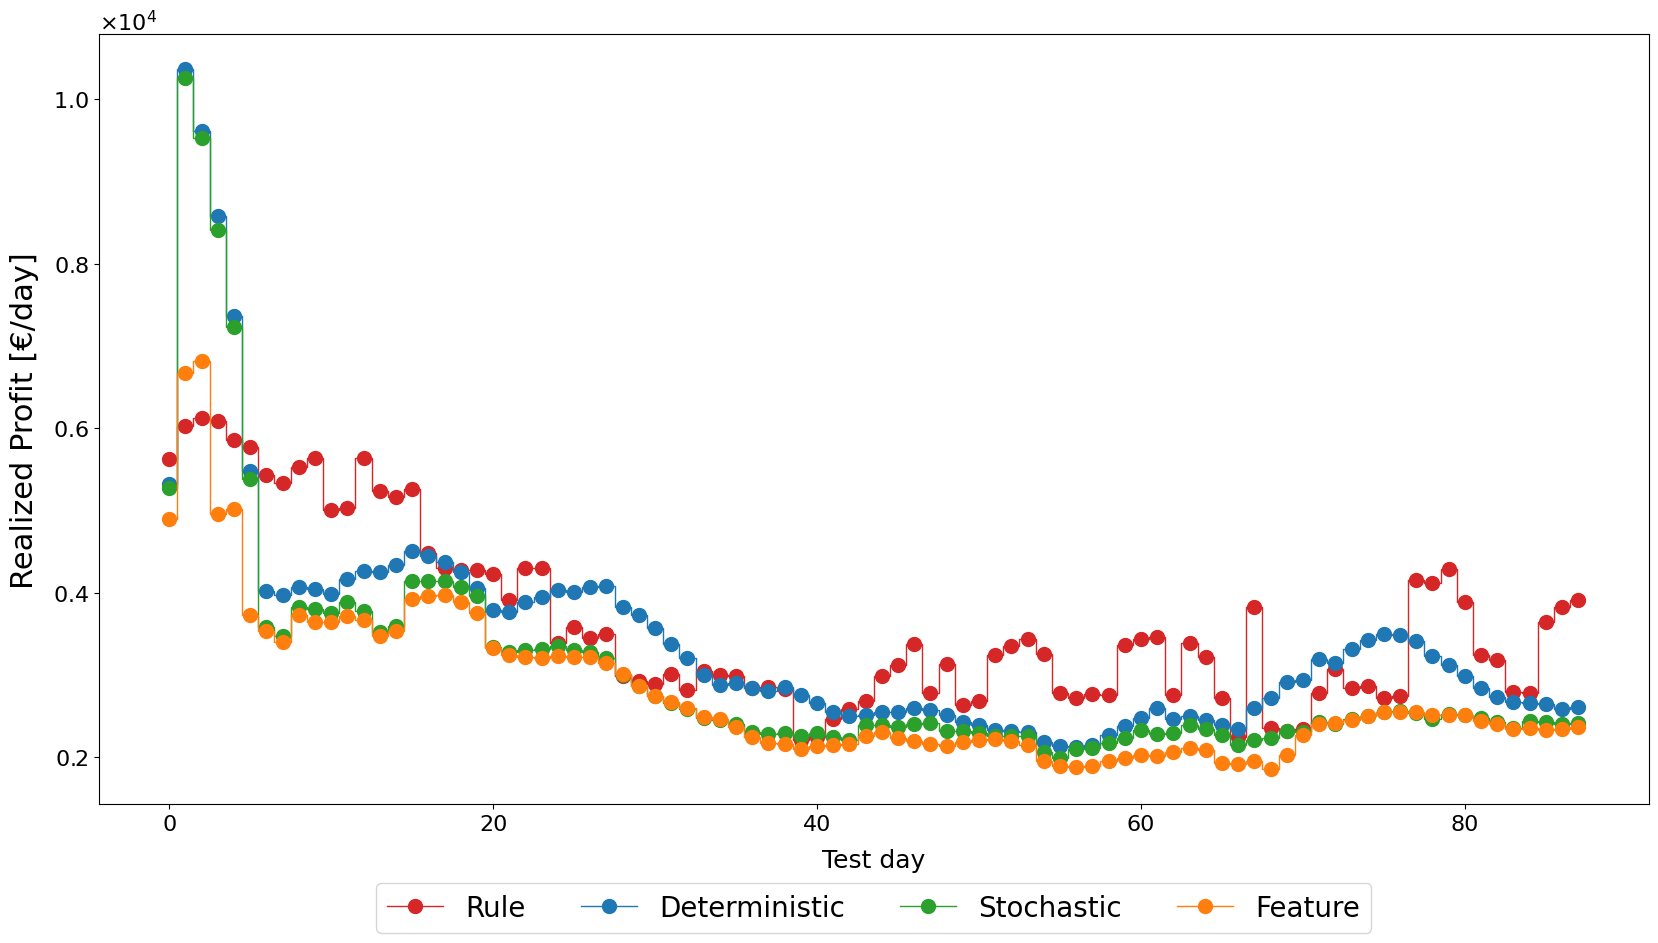

In [ ]:
plot_each_test_day_Profit(data_Exp,['rule','det','sto','feature'],x_axis,'steps-mid')

Check on of the days:

In [ ]:
f = 1
d = 5

fixd5 = [f'f{f}_d{d}_upd{upd}_t{upd+1}' for upd in range(0,4)]
print(fixd5)
x_axis = [upd for upd in range(3,5)]

['f1_d5_upd0_t1', 'f1_d5_upd1_t2', 'f1_d5_upd2_t3', 'f1_d5_upd3_t4']


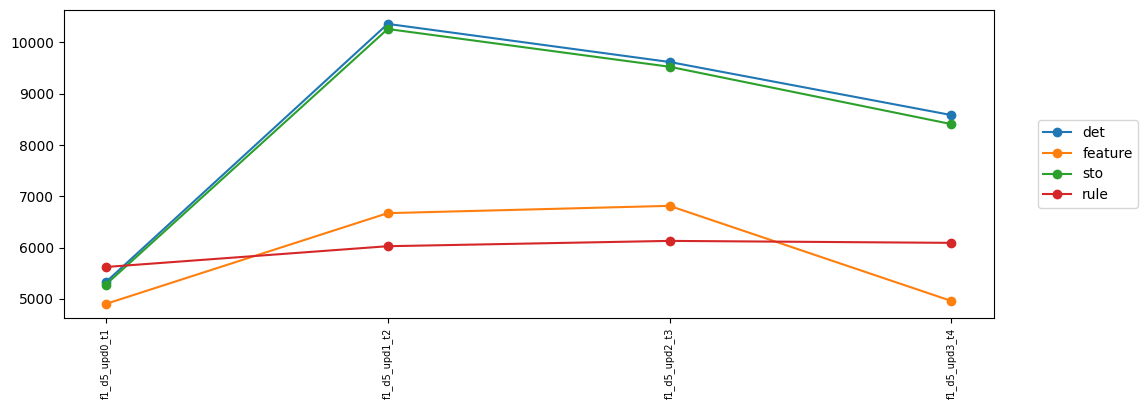

In [ ]:
data = df_Exp_Profit[fixd5].T
models = ['det','feature','sto','rule']
plot = data[models]
plt.figure(figsize=(12,4))
plt.plot(plot, 'o-')
plt.xticks(rotation = 90, fontsize=7)
plt.legend(models, bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.show()